In [87]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [88]:
!kaggle datasets download -d shrutimechlearn/churn-modelling

churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
#for unzipping

import zipfile
zip_ref = zipfile.ZipFile('/content/churn-modelling.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('/content/Churn_Modelling.csv')


In [92]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.shape

(10000, 14)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [95]:
df.duplicated().sum()

0

In [96]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [97]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [98]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [99]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [100]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
#now we need to one hot encode the columns

In [102]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [103]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [104]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
#now we do scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [106]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [107]:
#in keras we have sequential and non sequential models, we start with sequantial

In [108]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11)) #first layer we need to tell number of inputs it get
model.add(Dense(11,activation='relu')) #11 is number of neurons
model.add(Dense(1,activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [111]:
#history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)
history = model.fit(X_train,y_train,epochs=100,verbose=1,validation_split=0.2)
#we get history dictionary in history objext that contain info for every epoch

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 1186.9326 - accuracy: 0.7013 - val_loss: 27.9174 - val_accuracy: 0.6819
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 72.5296 - accuracy: 0.6734 - val_loss: 73.1125 - val_accuracy: 0.7862
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 81.6244 - accuracy: 0.6733 - val_loss: 213.2912 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 65.4684 - accuracy: 0.6770 - val_loss: 37.5413 - val_accuracy: 0.7875
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 49.2264 - accuracy: 0.6675 - val_loss: 50.6241 - val_accuracy: 0.3431
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 45.1402 - accuracy: 0.6794 - val_loss: 8.4268 - val_accuracy: 0.6587
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 51.9084 - accuracy: 0.6714 - val_loss: 19.8684 - val_

In [112]:
#weight between input layer and 1st layer
model.layers[0].weights

[<tf.Variable 'dense_9/kernel:0' shape=(11, 11) dtype=float32, numpy=
 array([[-1.6539553e-01, -1.1758292e-01, -4.4493201e-01,  2.6848617e-01,
          2.0200382e-01, -2.6983005e-01,  2.6132101e-01, -1.0775689e-03,
         -3.0090070e-01,  4.6026623e-01, -9.2503309e-02],
        [-1.8208612e+00, -7.3124808e-01, -5.0603747e-02,  2.2078769e-01,
          6.7186244e-02, -1.4647675e+00, -1.6171600e+00,  5.2865013e-02,
          1.2971888e+00, -3.6269876e-01,  1.4192476e+00],
        [ 2.6588666e-01, -1.3712241e-01,  2.2672296e-02, -5.9181833e-01,
          1.0002138e-01,  8.3401829e-02, -1.1094643e-01, -1.0769284e+00,
         -7.1514970e-01,  1.6121909e-01, -2.6806289e-01],
        [-1.8640788e-02,  3.2391676e-01, -3.2577416e-01, -4.4076091e-01,
         -1.4443439e-01,  3.3868334e-01,  1.6392560e-01, -8.2084537e-02,
          3.3015978e-02, -2.8031230e-01,  2.2046588e-01],
        [-6.0357803e-01, -2.0531418e+00,  3.4904593e-01,  5.5626012e-02,
         -1.5145320e-01, -7.0517406e-02, 

In [113]:
model.layers[2].weights

[<tf.Variable 'dense_11/kernel:0' shape=(11, 1) dtype=float32, numpy=
 array([[ 0.19489625],
        [-0.56123704],
        [ 0.48136577],
        [ 0.5467657 ],
        [ 0.21923119],
        [ 0.08843303],
        [-0.54120487],
        [-0.4247721 ],
        [-0.32631454],
        [-0.04179179],
        [ 0.1399141 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([-0.01901287], dtype=float32)>]

In [114]:
y_pred = model.predict(X_test)


63/63 [==============================] - 0s 2ms/step


In [115]:
y_pred

array([[0.0000000e+00],
       [8.1051714e-38],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [1.8514216e-33],
       [0.0000000e+00]], dtype=float32)

In [116]:
#what threshold should be?, for this we need plot roc auc graph

In [117]:
y_pred=np.where(y_pred>0.5,1,0)

In [118]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.797

In [121]:
#for increasing accuracy
#change act. fn. to relu
#increase epochs
#number of nodes inc. in hiddn layer
#can increase layers (but have to check as increasing more layers inc. overfitting)


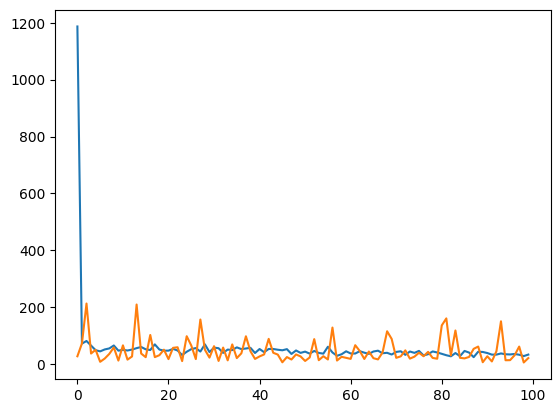

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

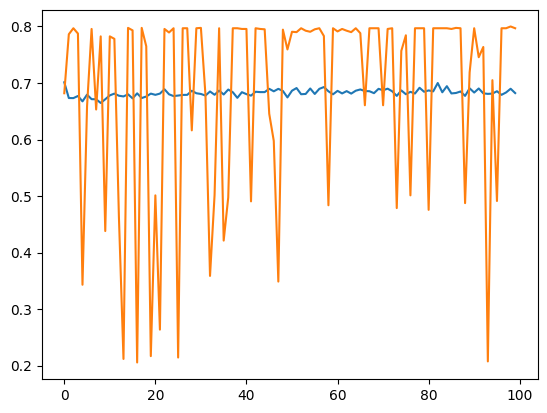

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])